# **Project Foundations for Data Science: FoodHub Data Analysis**

**Marks: 60**

### **Context**

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### **Objective**

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### **Data Description**

The data contains the different data related to a food order. The detailed data dictionary is given below.

### **Data Dictionary**

* **order_id:** Unique ID of the order
* **customer_id:** ID of the customer who ordered the food
* **restaurant_name:** Name of the restaurant
* **cuisine_type:** Cuisine ordered by the customer
* **cost:** Cost of the order
* **day_of_the_week:** Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* **rating:** Rating given by the customer out of 5
* **food_preparation_time:** Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* **delivery_time:** Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Let us start by importing the required libraries**

In [ ]:
# Library to suppress warnings- adding this code from the Uber Case Study notebook.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Adding these libraries from our other workbooks.
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

### **Understanding the structure of the data**

In [ ]:
# Since I was using Google Colab, I had to use this code.  Which has been shown in our practice material.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mounted at /content/drive

In [ ]:
# read the data - this code is also shown in our other workbooks.
# df = pd.read_csv('foodhub_order.csv')
# Since I was using Google Colab, I had to use this code.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### **Observations:**

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# This is code shown in our first Pandas for Data Science workbook, and the Hands on Notebook, it gives the number of rows and columns.
df.shape

(1898, 9)

In [ ]:
# This could be written to include text, and used to call the values individually.
print('\tCount\n\t------\nRows:\t', df.shape[0], '\nColumns:', df.shape[1])

	Count
	------
Rows:	 1898 
Columns: 9


#### **Observations:**

The .shape method brings back the number of rows and columns from the .csv workbook.  The value at position [0] belongs to the number of rows and the value at position [1] belongs to the number of columns.  

There are 1898 rows and 9 columns.  With 1898 rows there seems to be plenty data to help find insights for this case study.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# This was the next example in the Pandas for Data Science workbook, and gives a summary of the data in the workbook.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### **Observations:**

The .info() command brings back the range of entries (including the total amount of entries), the number of columns, and a table layout showing the array position, Column header, the quantity of non-null entries, the Datatype of each column, and a summary of the Datatypes and the memory usage.

*   order_id, customer_id, food_preparation_time, and delivery_time are Datatype **int64**
*   restraurant_name, cuisine_type, day_of_the_week, and rating are Datatype **object**
*   cost_of_the_order is Datatype **float**

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# This was the next example in the Pandas for Data Science workbook, and is the same as the code used from question number 2.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# The Hands on workbook shows this function being used to get counts of missing data, and shows that there are no null values in this data set.
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### **Observations:**

After running the .info() command, it can be seen that the total range of entries is 1898 and each column also shows that is has 1898 entries, so there are no missing values in the .csv spreadsheet.  The.isnull().sum() also shows that there are no null values in the spreadsheet too.  Although if you review the data in the spreadsheet you will see that for several entries in the rating column where the answer is - Not given, so it seems that the data set may have already been treated for missing entries.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# This code was shown in the Uber case study, and gives a summary of the columns with numerical values.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
# This is a way to look just at the output from the table above for the food_preparation_time with a standard decimal place for this calculation.
df['food_preparation_time'].describe().T

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [ ]:
# This is a way to look just at the output from the table above for the food_preparation_time, rounded to 2 decimal places.
round(df['food_preparation_time'].describe().T, 2)

count    1898.00
mean       27.37
std         4.63
min        20.00
25%        23.00
50%        27.00
75%        31.00
max        35.00
Name: food_preparation_time, dtype: float64

In [ ]:
# The data can be extracted and reshaped to only show the values we are looking for in this question.  Note that this column is listed as having int64, so the min and max do not have decimal places, while the mean does and is rounded to 0 decimal places because of the mean calculation.
print('Values for the food_preparation_time column:\n')
print('food_preparation_time min -\t', df['food_preparation_time'].min(), 'minutes')
print('food_preparation_time mean -\t', round(df['food_preparation_time'].mean()), 'minutes')
print('food_preparation_time max -\t', df['food_preparation_time'].max(), 'minutes')

Values for the food_preparation_time column:

food_preparation_time min -	 20 minutes
food_preparation_time mean -	 27 minutes
food_preparation_time max -	 35 minutes


#### **Observations:**

The .describe().T gives a table showing a summary of the numerical part of the table.  Individual summarys can be collected and presented in other ways too. The second and third examples are just for the food_preparation_time column in different numerical formats. The fourth set of code shows that the food_preparation_time min is 20 minutes, the mean is about 27 minutes (rounded to 0 decimal places), and the max is 35 minutes.

This data set shows about a 15 minute range in time for food prepartion, with an average of around 27 minutes.  This data will be useful when considered with other data later in this project.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Something similar is shown in the Uber Case Study.  Creating a list with one item for the rating column, creating an output showing the values in the rating column and the number of orders not rated and rated.
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [ ]:
# There are some examples in our other workbooks that lead to this code.  For this example I am listing only the not ranked information (now that we know how it is listed in the columns) and adding some text for reference.
print('Missing Value\tQuantity')
print("-" * 25)
print('\nNot given\t',df[df.rating == 'Not given'].shape[0])

Missing Value	Quantity
-------------------------

Not given	 736


#### **Observations:**

The value in the rating column used for not rated was 'Not given', it is the has the highest frequency of all the responses, and the count for 'Not given' is 736.  This will need to be taken into consideration later when this column is considered with other data values.

### **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

## **order_id**

In [ ]:
# Code to show the unique values for the order_id column, and code examples similar to this are used in our example workbooks.
print('The unique order_id value is ', df['order_id'].nunique(), ' out of ', df.shape[0], '.', sep = '')

The unique order_id value is 1898 out of 1898.


#### **Observations:**

Each order_id is a unique number, since the unique order_id and total number of rows are equal.

## **customer_id**

In [ ]:
# Code to show the unique values for the customer_id column, and code examples similar to this are used in our example workbooks.
print('The unique customer_id value is ', df['customer_id'].nunique(), ' out of ', df.shape[0], '.', sep = '')

The unique customer_id value is 1200 out of 1898.


In [ ]:
# This code shows customer_id values from the greatest to least in number of orders, and code examples similar to this are used in
# our example workbooks.  Since there are so many values it shows the 5 values at the head and the 5 values at the tail.
df['customer_id'].value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

#### **Observations:**

There are customers who have ordered food more than once since there are 1200 customer_id values out of 1898 entries.

## **restaurant_name**

In [ ]:
# Code to show the unique values for the restaurant_name column, and code examples similar to this are used in our example workbooks.
print('The unique restaurant_name value is ', df['restaurant_name'].nunique(), ' out of ', df.shape[0], '.', sep = '')

The unique restaurant_name value is 178 out of 1898.


In [ ]:
# This code shows restaurant_name values from the greatest to least in number of orders, and code examples similar to this are used
# in our example workbooks.  Since there are so many values it shows the 5 values at the head and the 5 values at the tail.
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

#### **Observations:**

There are 178 unique restaurant_name values in the spreadsheet.

## **cuisine_type**

In [ ]:
# Code to show the unique values for the cuisine_type column, and code examples similar to this are used in our example workbooks.
print('The unique cuisine_type value is ', df['cuisine_type'].nunique(), ' out of ', df.shape[0], '.', sep = '')

The unique cuisine_type value is 14 out of 1898.


In [ ]:
# This code shows the data for the cuisine_type from greatest to least order count, and code examples similar to this are used in
# our example workbooks.  Since there is a small number of items, all of the values are shown.
df['cuisine_type'].value_counts()

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

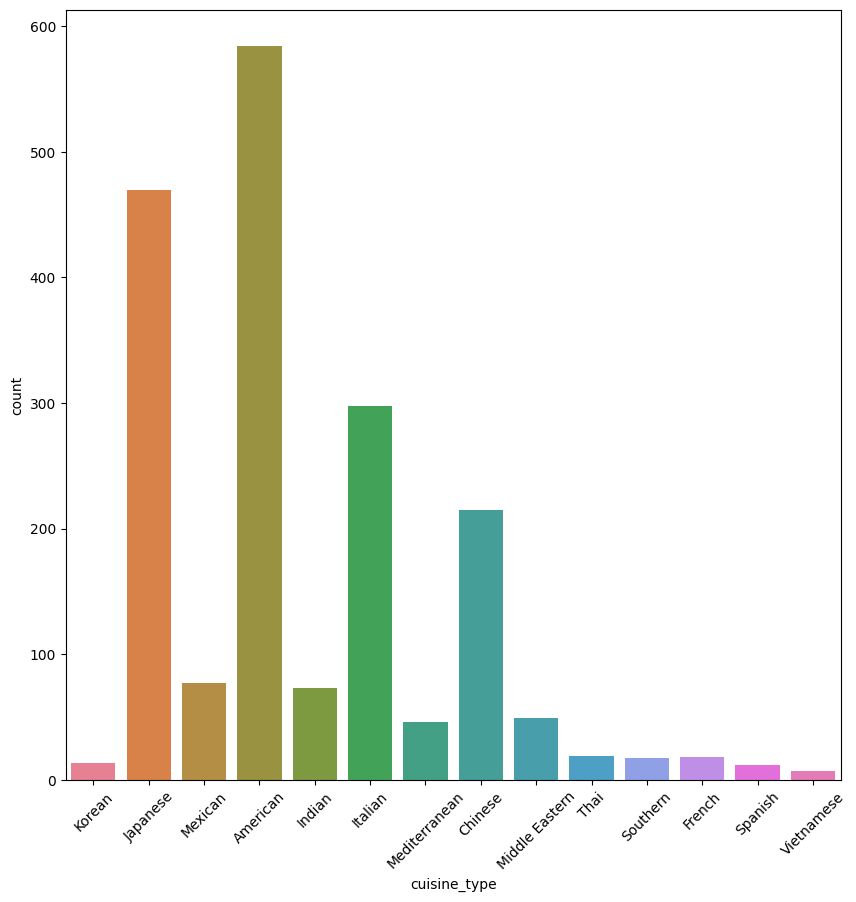

In [ ]:
# Countplot to show the values for number of purchases of the different cuisine-type values.
plt.figure(figsize = (10,10))
sns.countplot(data = df, x = 'cuisine_type', hue='cuisine_type')
plt.xticks(rotation=45)
plt.show()

#### **Observations:**

There are 14 unique cuisine_type values in the spreadsheet.  American has the highest count from this data set.

## **cost_of_the_order**

In [ ]:
# This code shows the cost_of_the_order values from greatest to least in number of orders with this cost, and code examples similar
# to this are used in our example workbooks.  Since the list is long, it shows the 5 values at the head and the 5 values at the tail.
df['cost_of_the_order'].value_counts()

cost_of_the_order
12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
5.48      1
17.07     1
6.26      1
9.61      1
29.59     1
Name: count, Length: 312, dtype: int64

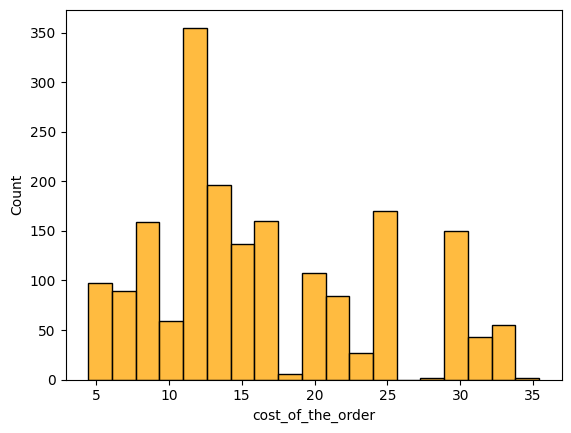

In [ ]:
# This is a histogram of the cost_of_the_order values, and code examples similar to this are used in our example workbooks.
sns.histplot(data=df,x='cost_of_the_order', color='orange')
plt.show()

In [ ]:
# This is a way to look just at the cost_of_the_order values for the statistical data, rounded to 2 decimal places, and code examples
# similar to this are used in our example workbooks.
round(df['cost_of_the_order'].describe().T, 2)

count    1898.00
mean       16.50
std         7.48
min         4.47
25%        12.08
50%        14.14
75%        22.30
max        35.41
Name: cost_of_the_order, dtype: float64

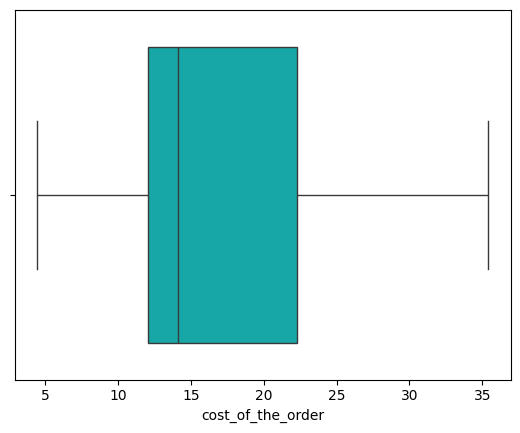

In [ ]:
# Here is a boxplot showing the statistical data for the cost_of_the_order values, and code examples similar to this are used in our
# example workbooks.
sns.boxplot(data=df,x='cost_of_the_order', color='c')
plt.show()

#### **Observations:**

There are different ways to look at the cost_of_the_order data. The range of the cost go from 4.47 to 35.41, with 16.50 being the mean,and 14.14 being the median of the cost value. When looking at the value_counts data it can be seen that the top 3 dollar values are just a little over $12.

## **day_of_the_week**

In [ ]:
# This codes shows the values and counts for the day_of_the_week values, and code examples similar to this are used in our example workbooks.
df['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

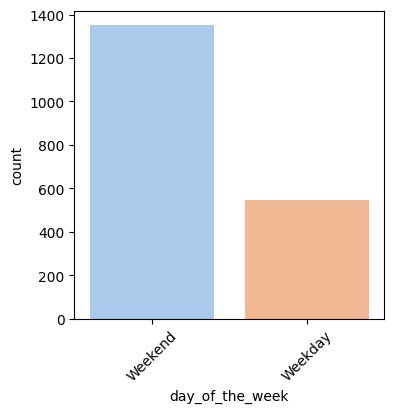

In [ ]:
# This code show the countplot for the day_of_the_week column, and code examples similar to this are used in our example workbooks.
plt.figure(figsize = (4,4))
sns.countplot(data = df, x = 'day_of_the_week', hue='day_of_the_week', palette='pastel')
plt.xticks(rotation=45)
plt.show()

#### **Observations:**

The day_of_the_week column is broken into 2 values - Weekend and Weekday.  The Weenend has a count of 1351 and the Weekday has a count of 547.  While the Weekdays include 5 days and the Weekends include 2 days, the data shows that the Weekends even with a shorter period of time bring in a higher count of orders placed.

## **rating**

In [ ]:
# This codes shows the values and counts for the rating values, and code examples similar to this are used in our example workbooks.
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

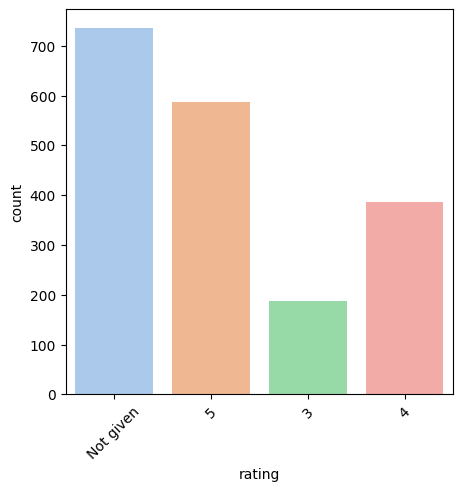

In [ ]:
# This code show the countplot for the rating column, and code examples similar to this are used in our example workbooks.
plt.figure(figsize = (5,5))
sns.countplot(data = df, x = 'rating', hue='rating', palette='pastel')
plt.xticks(rotation=45)
plt.show()

#### **Observations:**

The rating column has 4 unique entries with Not given as the largest count in the column.  Out of the entries with numerical values there were no 2s or 1s.

## **food_preparation_time**

In [ ]:
# This code shows the food_preparation_time values from greatest to least in count of time taken, and code examples similar to
# this are used in our example workbooks.  Since the list is not too long all the values are shown.
df['food_preparation_time'].value_counts()

food_preparation_time
21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
31    116
26    115
25    113
34    113
32    113
29    109
Name: count, dtype: int64

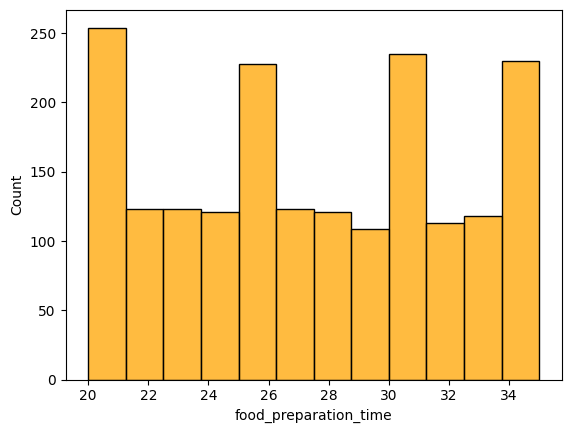

In [ ]:
# This is a histogram of the food_preparation_time values, and code examples similar to this are used in our example workbooks.
sns.histplot(data=df,x='food_preparation_time', color='orange')
plt.show()

In [ ]:
# This is a way to look just at the food_preparation_time values for the statistical data, rounded to 2 decimal places, and code
# examples similar to this are used in our example workbooks.
round(df['food_preparation_time'].describe().T, 2)

count    1898.00
mean       27.37
std         4.63
min        20.00
25%        23.00
50%        27.00
75%        31.00
max        35.00
Name: food_preparation_time, dtype: float64

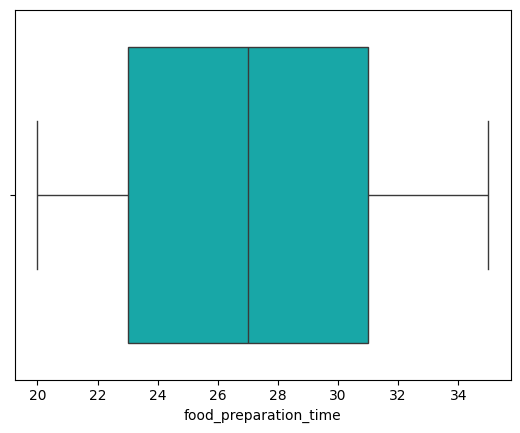

In [ ]:
# Here is a boxplot showing the statistical data for the food_preparation_time values, and code examples similar to this are used
# in our example workbooks.
sns.boxplot(data=df,x='food_preparation_time', color='c')
plt.show()

#### **Observations:**

There are different ways to look at the food_preparation_time data. The range of the food_preparation_time go from 20 minutes to 35 minutes, with 27.37 minutes being the mean,and 27 minutes being the median of the food_preparation_time value. When looking at the value_counts data it can be seen that several of the top values are in the 20s.

## **delivery_time**

In [ ]:
# This code shows the delivery_time values from greatest to least in count of time taken to deliver the order, and code examples similar
# to this are used in our example workbooks.  Since the list is not too long all the values are shown.
df['delivery_time'].value_counts()

delivery_time
24    162
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     77
32     59
33     49
31     41
Name: count, dtype: int64

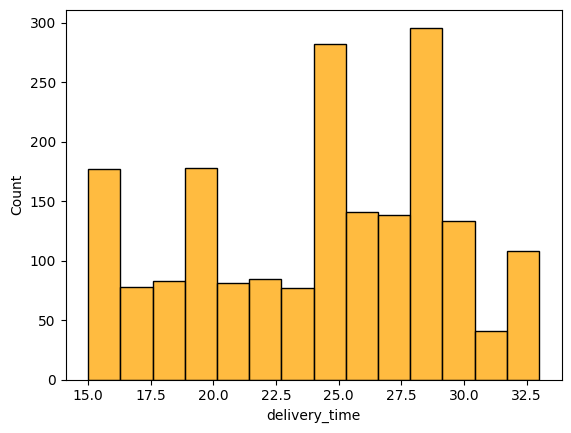

In [ ]:
# This is a histogram of the delivery_time values, and code examples similar to this are used in our example workbooks.
sns.histplot(data=df,x='delivery_time', color='orange')
plt.show()

In [ ]:
# This is a way to look just at the delivery_time values for the statistical data, rounded to 2 decimal places, and code examples
# similar to this are used in our example workbooks.
round(df['delivery_time'].describe().T, 2)

count    1898.00
mean       24.16
std         4.97
min        15.00
25%        20.00
50%        25.00
75%        28.00
max        33.00
Name: delivery_time, dtype: float64

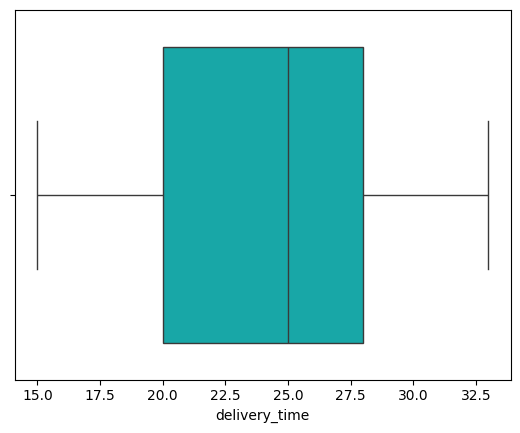

In [ ]:
# Here is a boxplot showing the statistical data for the delivery_time values, and code examples similar to this are used in our
# example workbooks.
sns.boxplot(data=df,x='delivery_time', color='c')
plt.show()

#### **Observations:**

There are different ways to look at the delivery_time data. The range of the delivery_time go from 15 minutes to 33 minutes, with 24.16 minutes being the mean,and 25 minutes being the median of the delivery_time value. When looking at the value_counts data it can be seen that the top 5 values are in the 20s.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# This code shows the top 5 restaurants in terms of the number of orders received, and code examples similar to this are used in our
# example workbooks.
df['restaurant_name'].value_counts().head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### **Observations:**

The results list the top 5 restaurants in terms of the numer of orders received.  By adding .head() to the value_counts() method the first 5 items in the ordered list are shown.  The top 5 restaurants make up about one third of the count of orders.  Later it might be good to see if they make that percetage of the sales too.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# This code shows the most popular cuisine on the weekends, and code examples similar to this are used in our example workbooks.
# Setting a variable rows with the day_of_the_week that equal Weekend.
df_weekend = df[df['day_of_the_week'] == 'Weekend']

# Counting the amount of orders per cuisine types and ranking them from greatest to least, and choosing to show the first value
# which is the greatest amount of orders per cuisine.
df_weekend['cuisine_type'].value_counts().head(1)

cuisine_type
American    415
Name: count, dtype: int64

#### **Observations:**

The results list the most popular cuisine on the weekends, which is American and makes up about 22 percent of the total number of the count of orders.  By adding .head(1) to the value_counts() method the first item in the ordered list of the cuisine)type for the weekend is shown.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# This code is used to calculate the number of orders that cost more than 20 dollars and the percentage of the orders that cost more
# than 20 dollars in this data set.
# This code collects the rows with cost_of_the_order with a value greater than 20 dollars into a variable.
df_gt_20_dol = df[df['cost_of_the_order']>20]

# This code divides the total number of rows with a cost_of_the_order greater than 20 dollars by the total number of orders times 100.
per_orders = (df_gt_20_dol.shape[0] / df.shape[0]) * 100

print('The number of orders that are more than 20 dollars is ', df_gt_20_dol.shape[0], ' out of ', df.shape[0],
      ' and the percentage of orders that cost more than 20 dollars is ', round(per_orders, 2), '%.', sep = '')

The number of orders that are more than 20 dollars is 555 out of 1898 and the percentage of orders that cost more than 20 dollars is 29.24%.


#### **Observations:**

To find this calculation you need to first find the number of order that are more than 20 dollars, then you need to divide this by the total number of orders and muliply this ration by 100 to find the percentage.  Also the output value is rounded to 2 decimal places.  The percentage of orders that cost more than 20 dollars is 29.24 %.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# This code outputs the mean delivery time in minutes rounded to 2 decimal places.
print('Delivery_time mean = ', round(df['delivery_time'].mean(), 2), 'minutes')

Delivery_time mean =  24.16 minutes


#### **Observations:**

The mean delivery_time is 24.16 minutes, this will be important later when considered with other data variables.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# This code ranks the counts of customer_id values from greatest to least and by using the .head(3) it only show the first 3 values.
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### **Observations:**

The results list the top 3 customer_id in terms of the numer of orders received. By adding .head(3) to the value_counts() method the first 3 items in the ordered list are shown.

### **Multivariate Analysis**

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


## **Data Information**

In [ ]:
# Most of the code for this section came from the Data Visualization workbook.
# Finding the breakdown of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### **Observations:**

There are 1898 entries and there are no null entries.  The data appears in flot64, int64, and oject types.

## **Statistics for all the data**

In [ ]:
# Showing the statistical data for all the data.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### **Observations:**

Because some of the data is of type object there are NaNs in the table.

## **Statistics for numerical data**

In [ ]:
# Showing the statistical data numerical data provided.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### **Observations:**

3 of the data types may be more important to consider for this section - cost_of_the_order, food_preparation_time, and delivery_time.

## **Restaurant counts in Descending order**

In [ ]:
# The order counts per restaurant.
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

#### **Observations:**

It seems that the top 5 restaurants make up about one third of the orders.


## **Sum of the cost_of_the_orders for the Restaurants.**

In [ ]:
# Finding the sum of the net revenue for the company.
df_total_coto = df['cost_of_the_order'].sum()
print('The net revenue for the restaurants is $', df_total_coto, '.  ', 'The average revenue per order is $',
      "%.2f" % round(df_total_coto / df.shape[0], 2), '.', sep = '')

The net revenue for the restaurants is $31314.82.  The average revenue per order is $16.50.


#### **Observations:**

While the average revenue per order is $16.50 it might be good to see where higher percentages of orders/revenue are coming from for this data set.

## **Revenue made from top 20 sales Restaurants**

In [ ]:
# Finding the revenue from the top 20 revenue restaurants.
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(20)

restaurant_name
Shake Shack                              3579.53
The Meatball Shop                        2145.21
Blue Ribbon Sushi                        1903.95
Blue Ribbon Fried Chicken                1662.29
Parm                                     1112.76
RedFarm Broadway                          965.13
RedFarm Hudson                            921.21
TAO                                       834.50
Han Dynasty                               755.29
Blue Ribbon Sushi Bar & Grill             666.62
Rubirosa                                  660.45
Sushi of Gari 46                          640.87
Nobu Next Door                            623.67
Five Guys Burgers and Fries               506.47
Momoya                                    492.13
Chipotle Mexican Grill $1.99 Delivery     491.69
Blue Ribbon Sushi Izakaya                 485.09
Tamarind TriBeCa                          426.71
Jack's Wife Freda                         416.75
Bareburger                                399.74
Name

#### **Observations:**

Although there are 178 restaurants the top 20 restaurants bring in about two thirds of the revenue for this company.

## **Boxplot cuisine_type vs. cost_of_the_order**

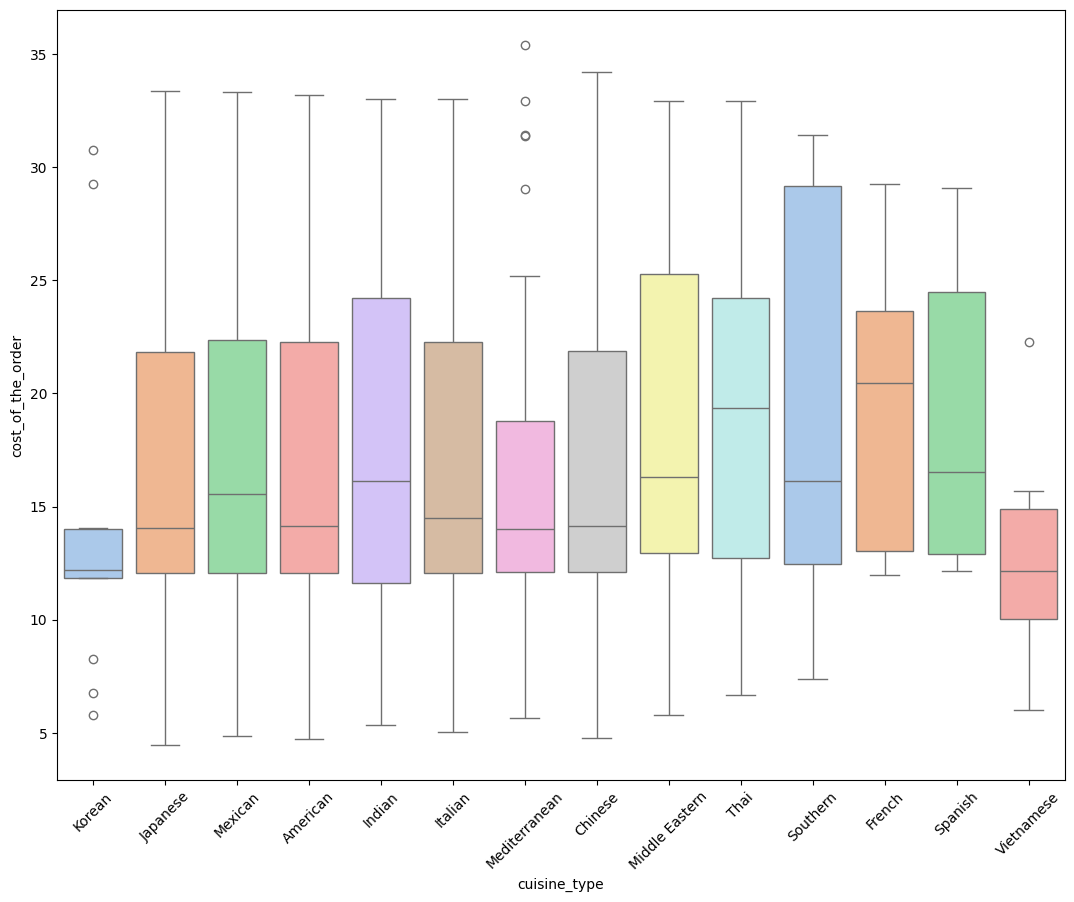

In [ ]:
# Ploting the boxplot of the cuisine vs. cost_of_the_order

plt.figure(figsize = (13, 10))

sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type', palette='pastel')

plt.xticks(rotation=45)

plt.show()

#### **Observations:**

Most cuisine_types seem to be in a fairly close range in cost.  The average cost for Thai and French food is a little higher the other cuisine_types.  Southern seems to cost the most, while Vietnamese seems to cost the least.

## **Boxplot cuisine_type vs. food_preparation_time**

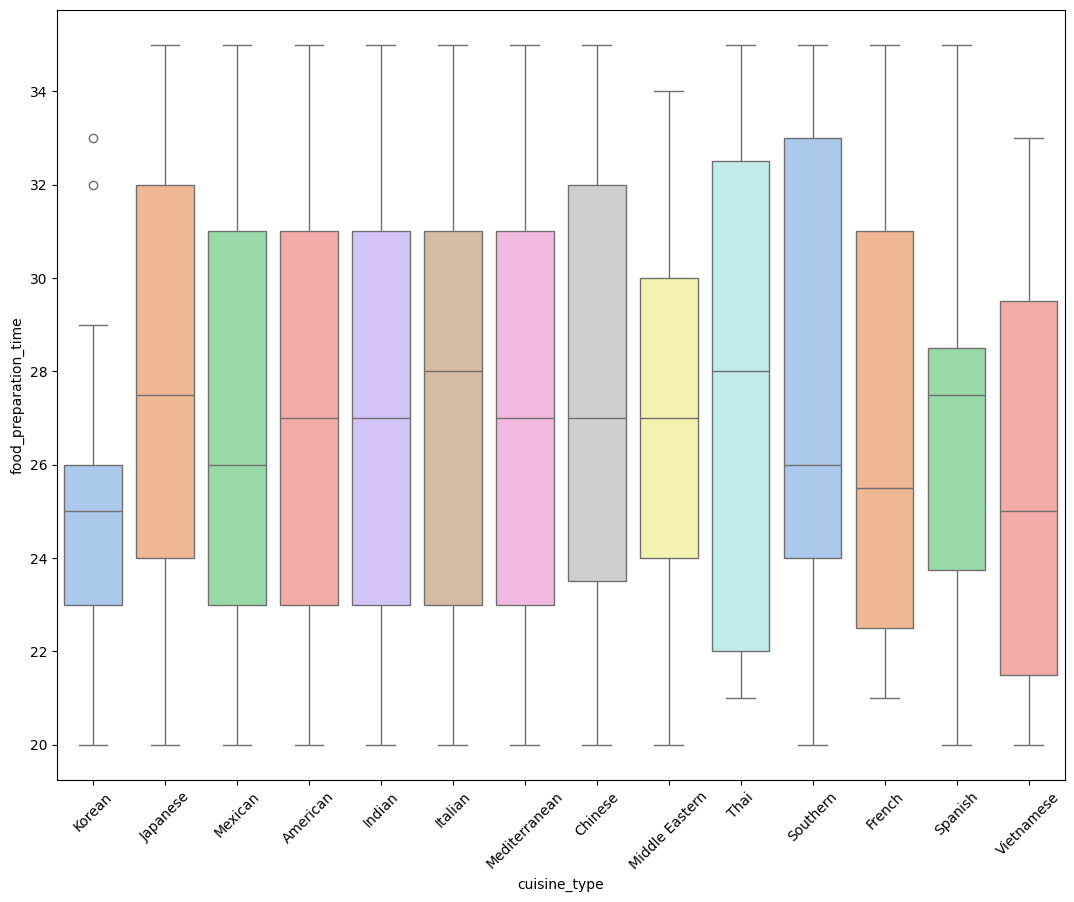

In [ ]:
# Ploting the boxplot of the cuisine vs. food_preparation_time

plt.figure(figsize = (13, 10))

sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', hue='cuisine_type', palette='pastel')

plt.xticks(rotation=45)

plt.show()

#### **Observations:**

Most cuisine_types seem to be in a fairly close range in cost. The average food_preparation_time for Thai, Spanish, and Italian food is a little higher the other cuisine_types. Vietnamese and Korean food seems to have a lesser food_preparation_time than the cuisine_types.

## **Boxplot day_of_the_week vs. delivery_time**

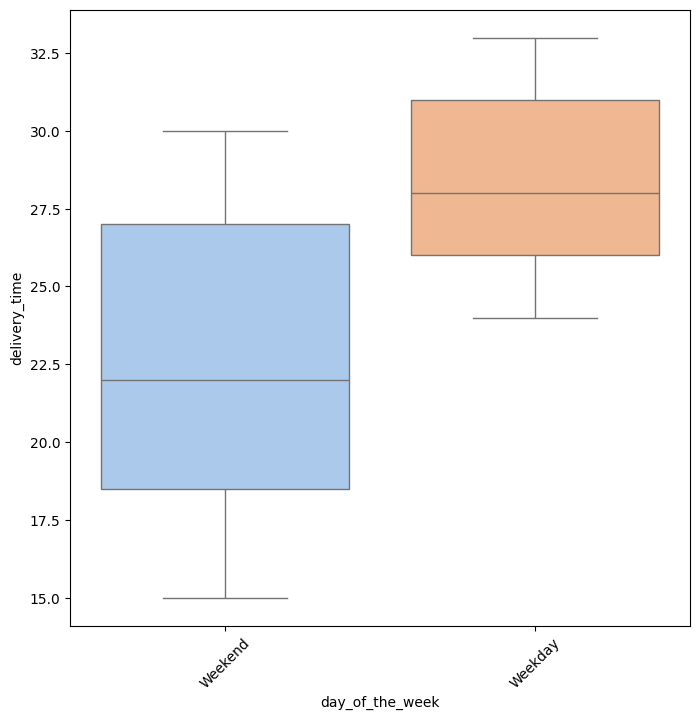

In [ ]:
# Ploting the boxplot of the day_of_the_week vs. delivery_time

plt.figure(figsize = (8, 8))

sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week', palette='pastel')

plt.xticks(rotation=45)

plt.show()

#### **Observations:**

Orders seem to be delivered more quickly on the weekends.  This may be worth collecting more data to study why this is happening.

## **Heatmap cost_of_the_order vs. food_preparation_time vs. delivery_time**

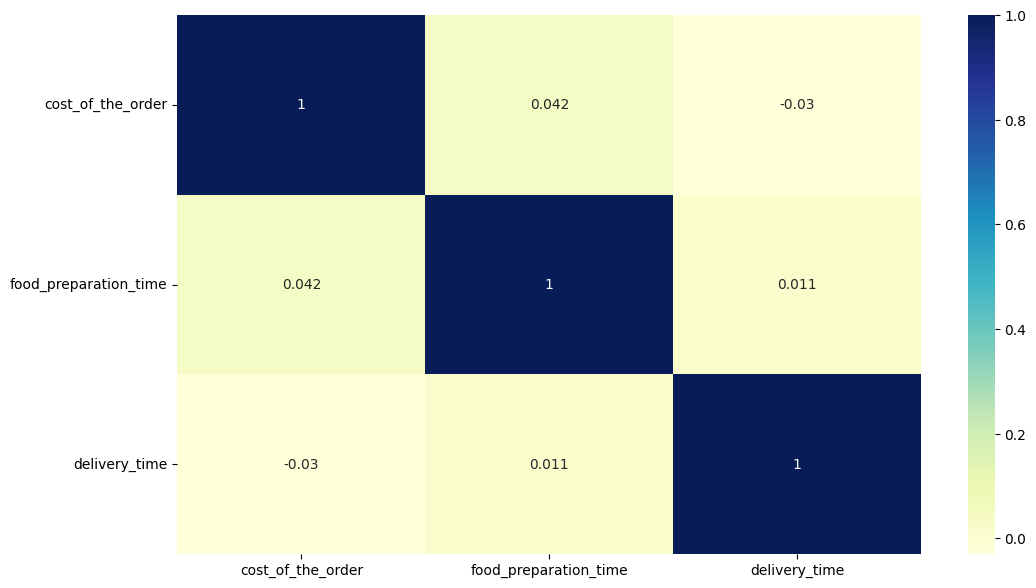

In [ ]:
# Heatmap correlation of cost_of_the_order vs. food_preparation_time vs. delivery_time

plt.figure(figsize = (12, 7))

sns.heatmap(data=df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True, cmap='YlGnBu')

plt.yticks(rotation=0)

plt.show()

#### **Observations:**

There are no strong correlations in this heatmap, but the largest is between cost_of_the_order and food_preparation_time.

## **Catplot rating vs. cost_of_the_order**

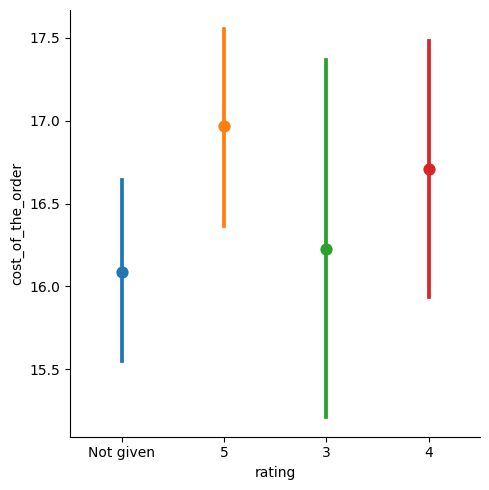

In [ ]:
# Catplot of the rating vs. cost_of_the_order
sns.catplot(data=df, x='rating', y='cost_of_the_order', hue='rating', kind='point');

#### **Observations:**

It seems like when the order cost more the rating given are higher in value.

## **Catplot rating vs. cost_of_the_order with second var day_of_the_week**

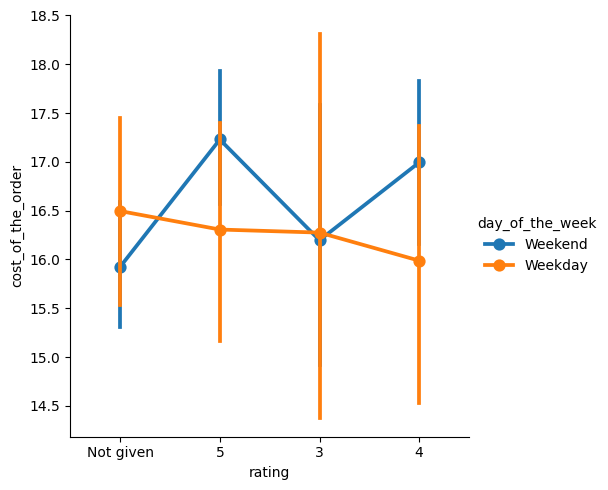

In [ ]:
# Catplot of the rating vs. cost_of_the_order with second var day_of_the_week
sns.catplot(data=df, x='rating', y='cost_of_the_order', hue='day_of_the_week', kind='point');

#### **Observations:**

The ratings for the cost_of_the_order seems to be pretty flat during the week, but have variances on the weekend.

## **Catplot cuisine_type vs. cost_of_the_order with second var rating**

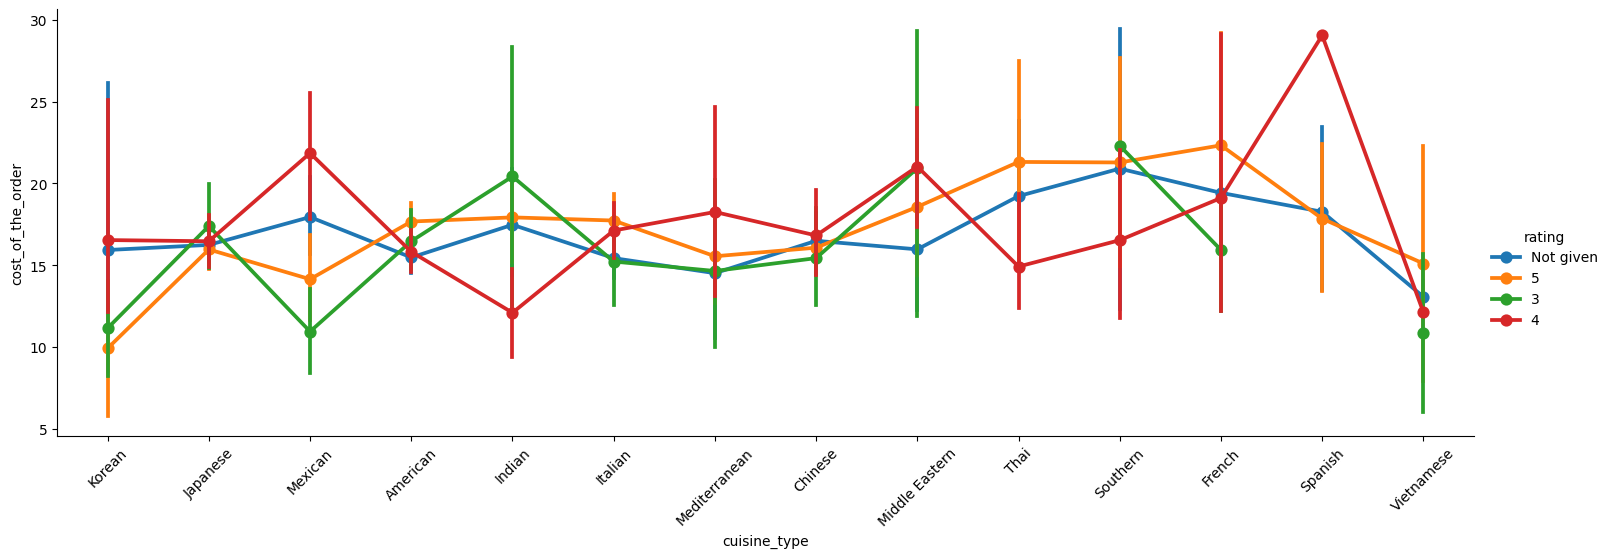

In [ ]:
# Catplot of the cuisine_type vs. cost_of_the_order with second var rating

sns.catplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='rating', kind='point', height = 5, aspect = 3)

plt.xticks(rotation=45)

plt.show()

#### **Observations:**

While there are several cuisine_types that have a higher rating as the cost goes up.  This plot shows that rating can really vary between the different cuisine_types.  It might be worthwhile to look further into specific restaurants in each cuisine type to see why at a later time.

## **Catplot rating vs. food_preparation_time**

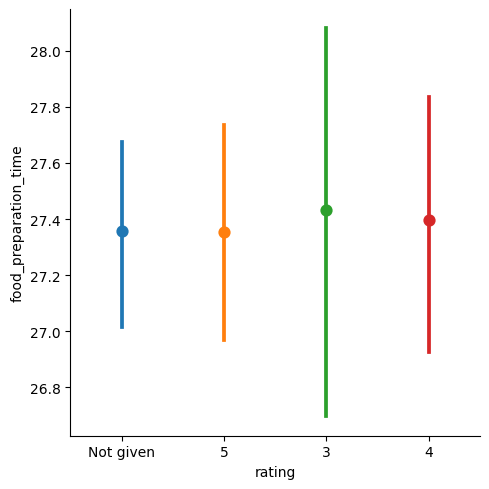

In [ ]:
# Catplot of the rating vs. food_preparation_time

sns.catplot(data=df, x='rating', y='food_preparation_time', hue='rating', kind='point');

#### **Observations:**

The ratings for food_preparation_time seem to be pretty consistent, with the rating of 3 having a larger range.

## **Catplot rating vs. food_preparation_time with second var day_of_the_week**

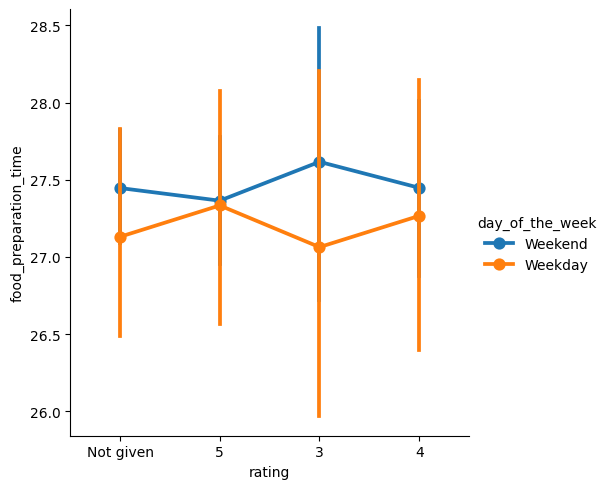

In [ ]:
# Catplot of the rating vs. food_preparation_time with second var day_of_the_week

sns.catplot(data=df, x='rating', y='food_preparation_time', hue='day_of_the_week', kind='point');

#### **Observations:**

With the exception of 5 rating field, it seems that the other ratings have higher counts on the weekend.

## **Catplot cuisine_type vs. food_preparation_time with second var rating**

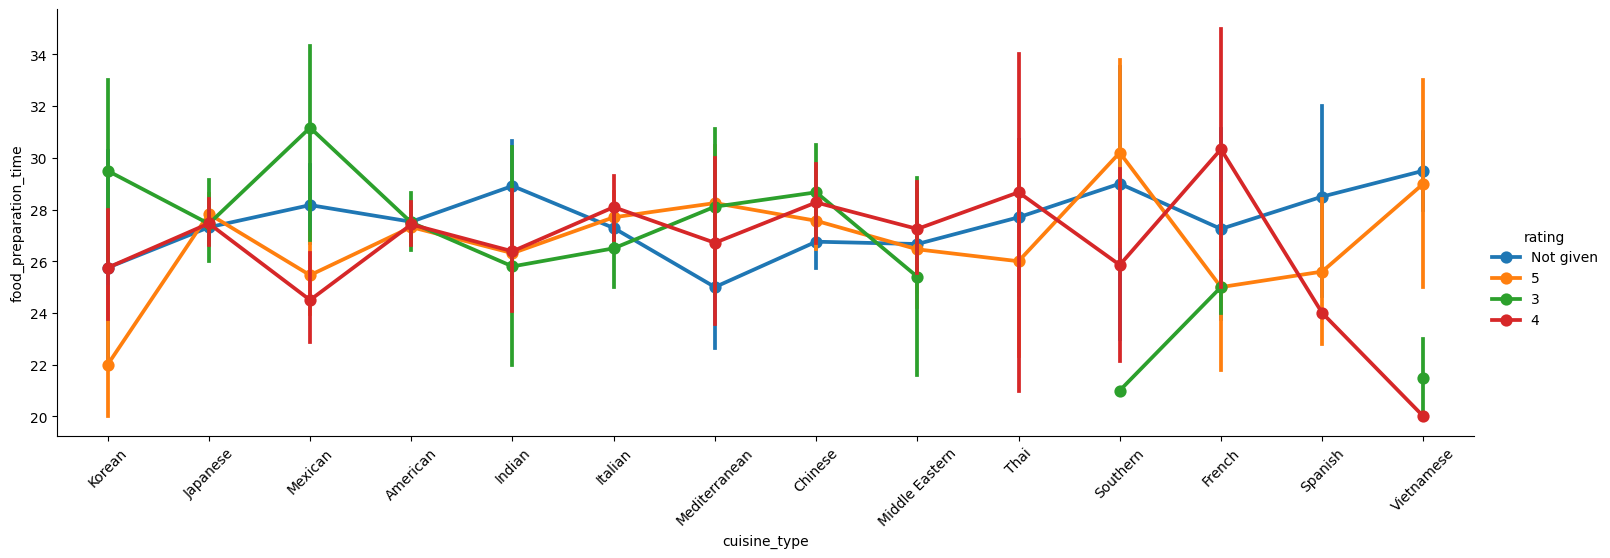

In [ ]:
# Catplot of the cuisine_type vs. food_preparation_time with second var rating

sns.catplot(data=df, x='cuisine_type', y='food_preparation_time', hue='rating', kind='point', height = 5, aspect = 3)

plt.xticks(rotation=45)

plt.show()

#### **Observations:**

Many of the cuisine_types are holding a strong patern for ratings for food_preparation_time, while others like Korean, Mexican, Southern, Spanish, and Vietnamese are showing variances.

## **Catplot rating vs. delivery_time**

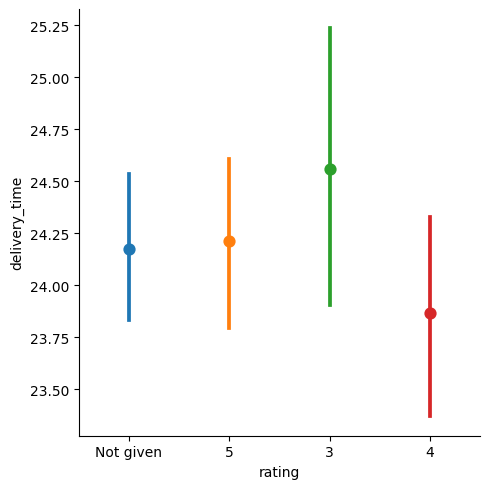

In [ ]:
# Catplot of the rating vs. delivery_time

sns.catplot(data=df, x='rating', y='delivery_time', hue='rating', kind='point');

#### **Observations:**

The fields for Not given and 5 are very similar, while the field for 3 is higher with a longer delivery_time and the field for 4 is lower with a shorter delivery_time.

## **Catplot rating vs. delivery_time with second var day_of_the_week**

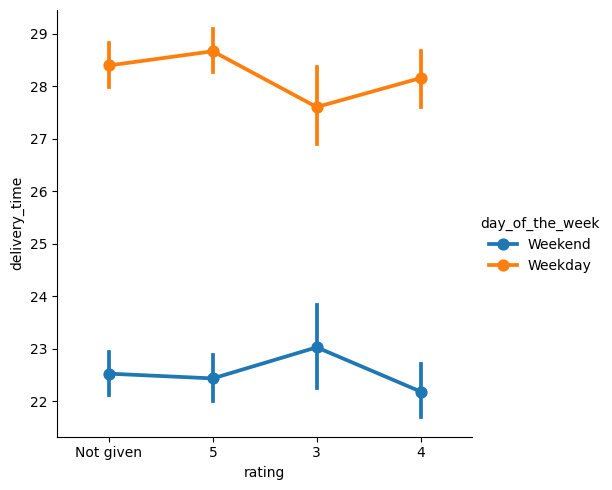

In [ ]:
# Catplot of the rating vs. delivery_time with second var day_of_the_week

sns.catplot(data=df, x='rating', y='delivery_time', hue='day_of_the_week', kind='point');

#### **Observations:**

On the weekends the ration of the 3 ratings seem to go up with just a small amount of more time taken.

## **Catplot cuisine_type vs. delivery_time with second var rating**

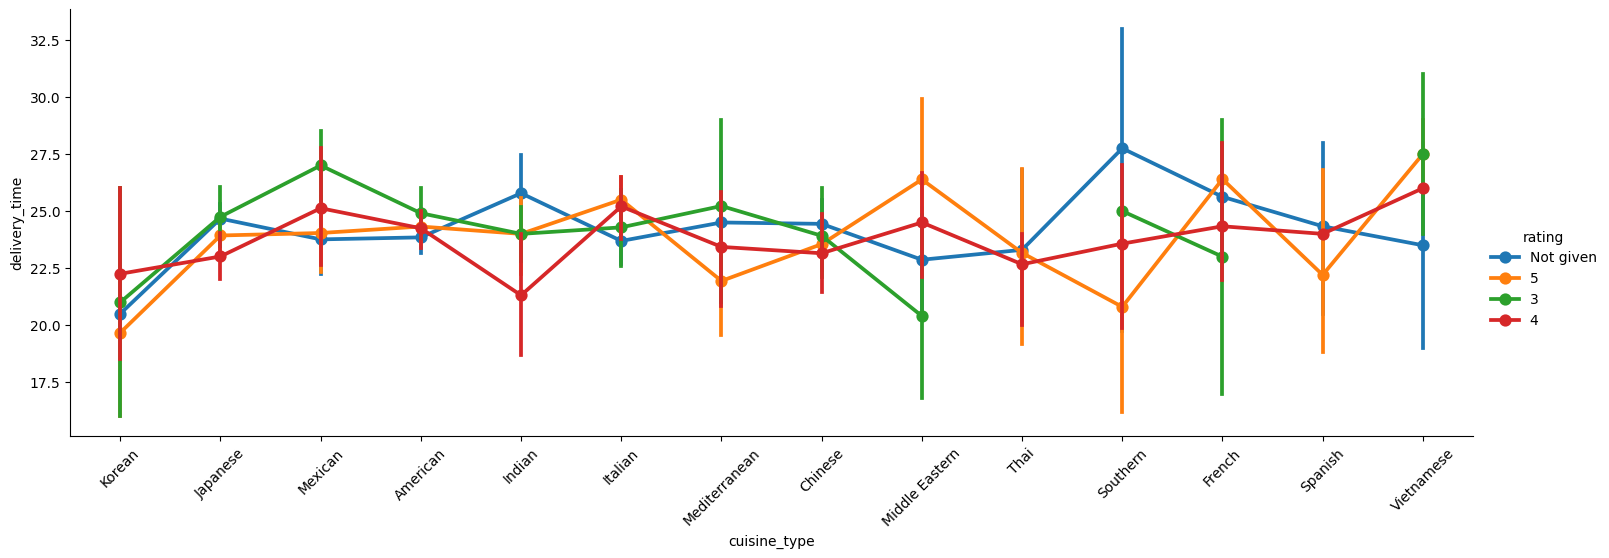

In [ ]:
# Catplot of the cuisine_type vs. delivery_time with second var rating

sns.catplot(data=df, x='cuisine_type', y='delivery_time', hue='rating', kind='point', height = 5, aspect = 3)

plt.xticks(rotation=45)

plt.show()

#### **Observations:**

Once again it seems the ratings for the different cuisine_tpes varies quite a bit with delivery_time.  Once again it might be worthwhile to look more specifically at the restaurants from each cuisine type more closely.

On another note, I looked at other plots for this data, but many of them did not seem to show much variance.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# This code was shown in some of our other workbooks.
# Removing the rows with a "Not given" in them from the data.
df_rating_with_values = df[df['rating'] != 'Not given'].copy()

# Changing the values of the ratings from object to integer.
df_rating_with_values['rating'] = df_rating_with_values['rating'].astype('int')

# Showing the information for the data with the "Not given" rows removed.  The rating column is now of type integer and there are 1162 rows now.
df_rating_with_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


In [ ]:
# Showing that the only values left for the rating column are numerical values and their counts.
df_rating_with_values['rating'].value_counts()

rating
5    588
4    386
3    188
Name: count, dtype: int64

In [ ]:
# The Fantasy notebook has some examples similar to this code.
df_rating_total_count = df_rating_with_values.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

# Showing the top 5 restaurants total points in ratings count.  Only 4 are greater than 50, so there will be 4 or less restaurants
# that will be chosen.
df_rating_total_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# The Fantasy notebook has some examples similar to this code.
df_rating_average = df_rating_with_values.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

# Showing that the average rating values in descending order.  There are 156 restaurants still in the list at this point.
df_rating_average['rating']

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
151    3.0
152    3.0
153    3.0
154    3.0
155    3.0
Name: rating, Length: 156, dtype: float64

In [ ]:
# While the first count is at 0, this means that there are 110 restaurants that have an average rating greater than 4.0.
df_rating_average.head(111)

,restaurant_name,rating
0,'wichcraft,5.000000
1,Ravagh Persian Grill,5.000000
2,Chola Eclectic Indian Cuisine,5.000000
3,Chote Nawab,5.000000
4,Junoon,5.000000
...,...,...
106,ilili Restaurant,4.153846
107,Parm,4.128205
108,Rubirosa,4.125000
109,Bareburger,4.058824


In [2]:
# Merging the 2 new dataframes from this quetion to combine the total and average data in one dataframe.
df_merge = pd.merge(df_rating_total_count, df_rating_average, how = "left", on = "restaurant_name")
df_merge

NameError: name 'pd' is not defined

In [ ]:
# Outputting only the restaurants who have met the criteria for the promotional offer.
df_promo_offer = df_merge[(df_merge['rating_x'] > 50) & (df_merge['rating_y'] > 4)]
df_promo_offer

,restaurant_name,rating_x,rating_y
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


In [ ]:
# Double-checking that the merge values completed correctly in the data listed above in the question.
df_rest_rating_average = df_rating_average[df_rating_average['restaurant_name'] == 'Shake Shack']
df_rest_rating_average

,restaurant_name,rating
93,Shake Shack,4.278195


In [ ]:
# Double-checking that the merge values completed correctly in the data listed above in the question.
df_rest_rating_average = df_rating_average[df_rating_average['restaurant_name'] == 'The Meatball Shop']
df_rest_rating_average

,restaurant_name,rating
66,The Meatball Shop,4.511905


In [ ]:
# Double-checking that the merge values completed correctly in the data listed above in the question.
df_rest_rating_average = df_rating_average[df_rating_average['restaurant_name'] == 'Blue Ribbon Sushi']
df_rest_rating_average

,restaurant_name,rating
101,Blue Ribbon Sushi,4.219178


In [ ]:
# Double-checking that the merge values completed correctly in the data listed above in the question.
df_rest_rating_average = df_rating_average[df_rating_average['restaurant_name'] == 'Blue Ribbon Fried Chicken']
df_rest_rating_average

,restaurant_name,rating
89,Blue Ribbon Fried Chicken,4.328125


#### **Observations:**

There are 4 restaurants that are eligible for the promotional in advertisement:

*   Shake Shack
*   The Meatball Shop
*   Blue Ribbon Sushi
*   Blue Ribbon Fried Chicken

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# This code is similar to our practice exercise on conditional statements.

def net_revenue(x):

    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

# Creating a copy of the original data.
df_new_rev = df.copy()

# Creates a column with the net revenue for the company for each order placed.
df_new_rev['revenue'] = df_new_rev['cost_of_the_order'].apply(net_revenue)

# Summing the revenue that the company has made from these orders.
df_total_net_revenue = df_new_rev['revenue'].sum()

# Printing the company's net revenue rounded to 2 decimal places.
print("The company's total net revenue for these orders is $", "%.2f" % round(df_total_net_revenue, 2), ".", sep = "")

The company's total net revenue for these orders is $6166.30.


In [ ]:
# This code is similar to our practice exercise on conditional statements.
def net_revenue_gt_20(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0
    else:
        return x*0

# Creates a column with the net revenue for the company for each order placed.
df_new_rev['revenue1'] = df_new_rev['cost_of_the_order'].apply(net_revenue_gt_20)

# Summing the revenue that the company has made from these orders.
df_total_net_revenue1 = df_new_rev['revenue1'].sum()

# Printing the company's net revenue rounded to 2 decimal places.
print("The company's net revenue for orders greater than $20 is $", "%.2f" % round(df_total_net_revenue1, 2), ".", sep = "")

The company's net revenue for orders greater than $20 is $3688.73.


In [ ]:
# This code is similar to our practice exercise on conditional statements.
def net_revenue_between_20_and_5(x):
    if x > 20:
        return x*0
    elif x > 5:
        return x*0.15
    else:
        return x*0

# Creates a column with the net revenue for the company for each order placed.
df_new_rev['revenue2'] = df_new_rev['cost_of_the_order'].apply(net_revenue_between_20_and_5)

# Summing the revenue that the company has made from these orders.
df_total_net_revenue2 = df_new_rev['revenue2'].sum()

# Printing the company's net revenue rounded to 2 decimal places.
print("The company's net revenue for orders less than $20 and greater than $5 is $", "%.2f" % round(df_total_net_revenue2, 2), ".", sep = "")

The company's net revenue for orders less than $20 and greater than $5 is $2477.58.


In [ ]:
#Showing the head of the data with the new columns added.
df_new_rev.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,revenue1,revenue2
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,7.6875,0.0000
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,0.0000,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,0.0000,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,7.3000,0.0000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,0.0000,1.7385


In [ ]:
# Finding the number of orders in the 3 revenue areas.
print('The number of orders greater than $20 is ', (df_new_rev['cost_of_the_order'] > 20).sum(),
      ' and the number of orders greater than $5 and less than or equal to $20 is ',
       ((df_new_rev['cost_of_the_order'] > 5) & (df_new_rev['cost_of_the_order'] <= 20)).sum(),
      ' and the number of orders less than or equal to $5 is ', (df_new_rev['cost_of_the_order'] <= 5).sum(), '.', sep = '')

The number of orders greater than $20 is 555 and the number of orders greater than $5 and less than or equal to $20 is 1334 and the number of orders less than or equal to $5 is 9.


#### **Observations:**

The orders that bring in 25% revenue are around 29% of the orders.  The orders that bring in 15% revenue are around 70% of the orders.  The orders that do not bring in revenue are the around 0.5% of the orders.  The orders that are over 20 dollars bring in about 60% of the revenue.  The orders that are over 5 dollars and less than or equal to 20 dollars bring in about 40% of the revenue.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# This code is similar to code in our other workbooks.
# Creating a copy of the original data.
df_new_column = df.copy()

# Creating a new column named order_time which is a sum of the food_preparation_time and delivery_time of each order.
df_new_column['order_time'] = df_new_column['food_preparation_time'] + df_new_column['delivery_time']

# Showing the head of the new data profile.
df_new_column.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,order_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [ ]:
# Outputing the statistics for the new column order_time and rounding the output to 2 decimal places.
round(df_new_column['order_time'].describe().T, 2)

count    1898.00
mean       51.53
std         6.83
min        35.00
25%        47.00
50%        52.00
75%        56.00
max        68.00
Name: order_time, dtype: float64

In [ ]:
# Calculating the average order time rounded to 2 decimal places.
print('The total delivery time mean = ', round(df_new_column['order_time'].mean(), 2), 'minutes\n')

# Collecting the values that are greating than 60 from the order_time column.
df_gt_60_min = df_new_column[df_new_column['order_time']>60]

# Finding the percentage of orders that have taken over 60 minutes for the order_time.
per_orders = (df_gt_60_min.shape[0] / df_new_column.shape[0]) * 100

print('The count of orders that take more than 60 minutes to prepare and deliver is ', df_gt_60_min.shape[0],
      ' out of ', df_new_column.shape[0], ' and the percentage of orders that take more than 60 minutes to prepare and deliver is ', round(per_orders, 2), '%.', sep = '')

The total delivery time mean =  51.53 minutes

The count of orders that take more than 60 minutes to prepare and deliver is 200 out of 1898 and the percentage of orders that take more than 60 minutes to prepare and deliver is 10.54%.


#### **Observations:**

The mean total time for an order is 51.53 minutes.  200 of the 1898 orders take more than 60 minutes and this is around 10.54% of the orders.  It may be worthwhile find out if these are special cases, such as restraurant, food type, distance, or traffic issues.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# This code is similar to code used in our other workbooks.
# Extracting and rounding the Weekday delivery_time to 2 decimal places.
print('Weekday delivery_time mean                = ', round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean(), 2), 'minutes')

# Extracting and rounding the Weekend delivery_time to 2 decimal places.
print('Weekend delivery_time mean                = ', round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean(), 2), 'minutes')

# Substracting the average Weekday delivery_time from the average Weekend delivery time and rounding to 2 decimal places.
print('Weekday - Weekend delivery_time mean time =  ',
      round((df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()) - (df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()), 2),
      'minutes')

# Variables could have been used to hold these different data instead of repeating the code.

Weekday delivery_time mean                =  28.34 minutes
Weekend delivery_time mean                =  22.47 minutes
Weekday - Weekend delivery_time mean time =   5.87 minutes


#### **Observations:**

The mean delivery-time during the weekdays is about 28.34 minutes, and it is about 22.47 minutes on the weekends.  It seems that the delivery_time on he weekends is about 5.87 minutes faster than on the weekdays.  Even though there are fewer orders during the week, it seems to take about 6 minutes more on the average than weekends.  The reason behind this might be worth researching.

### **Conclusion and Recommendations**

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### **Conclusions:**

*  The top 20 restaurants (out of 178) for cost_of_the_order bring in about two thirds of the restaurant revenue.
*  The total revenue for this company is 6,166.30 dollars.
*  The orders costing over 20 dollars bring in 3688.73 dollars revenue for the company, which is around sixty percent of the revenue.
*  The count for orders costing over 20 dollars is 555 and this is around 29 percent of the orders.  These orders allow for 25 percent revenue for the company.
*  Total order time ranges from 35 to 68 minutes, with 52 minutes being the average.
*  200 orders took over 60 minutes for total order time and this is about 10.54 percent of the orders.
*  More orders are placed on the Weekend (count of 1351) than the Weekday (count of 547), even though there are 2 days for the Weekends and 5 days for the Weekdays.
*  The delivery time on Weekends has a average of 22.47 minutes and the average delivery time for the Weekdays is 28.34 minutes.  The average delivey time on the Weekends is about 5.87 minutes faster.
*  The most popular cuisine_type is American, which is around 31 percent of the count of orders.
*  The top 4 restaurants in count of orders, are also the top 4 restaurants in cumlative ratings and all have an average rating over 4.0.
*  The ratings field included the fields of 'Not given', 5, 4, and 3.  Ratings of 2 and 1 were not listed.

### **Recommendations:**

*  Creating promotions with the top 20 restaurants may help to increase revenue.
*  Creating promotions with restaurants that tend to have orders costing over 20 dollars may help bring in more revenue.
*  Creating promotions for the Weekdays may help bring in more revenue.
*  Collecting more data on why there are 200 orders that are taking over 60 minutes in total delivery time may add more insight.
*  Collecting more data on why delivery times are much faster on the Weekends may add more insight.
*  It might be worthwhile to research why so many orders do not have a rating and design a way to try get more feedback from the customers.

---